In [79]:
import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
import numpy as np
import numpy as np
from keras import backend as K
import tensorflow as tf
from keras.models import load_model
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix
import numpy as np
from keras import backend as K
import tensorflow as tf
from sklearn.inspection import permutation_importance
import dill


**Load the dataset**

In [6]:
multiclass_test = pd.read_csv("../../dataset/multiclass_test.csv",header= 0)
multiclass_training = pd.read_csv("../../dataset/multiclass_training.csv", header= 0)

In [7]:
multiclass_training.head()

,Unnamed: 0,DepMap_ID,A1BG..1.,A1CF..29974.,A2M..2.,A2ML1..144568.,A3GALT2..127550.,A4GALT..53947.,A4GNT..51146.,AAAS..8086.,...,ZWINT..11130.,ZXDA..7789.,ZXDB..158586.,ZXDC..79364.,ZYG11A..440590.,ZYG11B..79699.,ZYX..7791.,ZZEF1..23140.,ZZZ3..26009.,label
0,212,ACH-000352,0.031560,0.020701,0.024027,0.015165,0.083180,0.045681,0.152042,0.440972,...,0.877840,0.002812,0.017894,0.020636,0.020332,0.138445,0.012091,0.049077,0.545678,5
1,619,ACH-000966,0.014205,0.102370,0.043301,0.130849,0.032096,0.105158,0.106484,0.123385,...,0.894899,0.012680,0.015837,0.017439,0.101407,0.097252,0.007967,0.088759,0.192388,2
2,970,ACH-002181,0.091952,0.074313,0.012798,0.005650,0.111340,0.077014,0.055757,0.287227,...,0.942884,0.015960,0.021886,0.141327,0.033790,0.537413,0.106558,0.065613,0.412021,2
3,267,ACH-000435,0.014217,0.088321,0.027686,0.008344,0.143408,0.022670,0.012488,0.332068,...,0.250682,0.013639,0.011824,0.032894,0.051714,0.051038,0.019694,0.128508,0.545724,2
4,192,ACH-000322,0.038509,0.092706,0.046166,0.026288,0.378282,0.032907,0.106303,0.080718,...,0.077104,0.116839,0.054943,0.043476,0.051321,0.131123,0.066249,0.353908,0.429934,3


In [8]:
y_test = pd.get_dummies(multiclass_test, columns = ['label']).iloc[:,17395:17405]
X_train = np.array(multiclass_training.drop(['label','Unnamed: 0','DepMap_ID'], axis = 1))
y_train = pd.get_dummies(multiclass_training, columns = ['label']).iloc[:,17395:17405]
X_test = np.array(multiclass_test.drop(['label','DepMap_ID','Unnamed: 0'], axis = 1))

In [9]:
X_train_reshaped = X_train.reshape(817,17393)
X_test_reshaped = X_test.reshape(205,17393)

**First model**

In [10]:
model = Sequential()

model.add(Dense(200, input_shape=(17393,)))
model.add(Activation('relu'))
#model.add(Dropout(0.25))


model.add(Dense(10))
model.add(Activation('softmax'))
#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 5, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =30,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))

#in multiclass possiamo aggiungere la softmax come activation function in modo da aumentare la probabilità che solo
#un nodo di uscita venga scelto ogni volta
#se per caso due possibili risultati sono anche parzialmente sovrapponibili si usa come activation function sigmoid

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-11-28 10:17:17.916326: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-28 10:17:17.918104: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-28 10:17:18.183890: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-28 10:17:18.188120: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-28 10:17:18.338810: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/30
26/26 [==============================] - 1s 17ms/step - loss: 2.9418 - accuracy: 0.1983 - val_loss: 1.8891 - val_accuracy: 0.2976

Epoch 00001: saving model to best_model.hdf5
Epoch 2/30
 1/26 [>.............................] - ETA: 0s - loss: 1.7711 - accuracy: 0.4062

2021-11-28 10:17:18.785069: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 12ms/step - loss: 1.7177 - accuracy: 0.4455 - val_loss: 1.7353 - val_accuracy: 0.3951

Epoch 00002: saving model to best_model.hdf5
Epoch 3/30
26/26 [==============================] - 0s 11ms/step - loss: 1.4198 - accuracy: 0.5581 - val_loss: 1.5526 - val_accuracy: 0.5122

Epoch 00003: saving model to best_model.hdf5
Epoch 4/30
26/26 [==============================] - 0s 12ms/step - loss: 1.1427 - accuracy: 0.6854 - val_loss: 1.5243 - val_accuracy: 0.4683

Epoch 00004: saving model to best_model.hdf5
Epoch 5/30
26/26 [==============================] - 0s 11ms/step - loss: 0.9124 - accuracy: 0.7772 - val_loss: 1.4217 - val_accuracy: 0.5854

Epoch 00005: saving model to best_model.hdf5
Epoch 6/30
26/26 [==============================] - 0s 12ms/step - loss: 0.8197 - accuracy: 0.7993 - val_loss: 1.3434 - val_accuracy: 0.5707

Epoch 00006: saving model to best_model.hdf5
Epoch 7/30
26/26 [==============================] - 0s 12ms/step - loss: 0.6

**More complex model: increase width and depth**

In [51]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy']) #ottimizzatore che usa stochastic gradient , errore assoluto medio

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =100,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/100
 4/26 [===>..........................] - ETA: 0s - loss: 4.9962 - accuracy: 0.1250

2021-11-28 10:43:55.548925: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 21ms/step - loss: 3.1327 - accuracy: 0.1530 - val_loss: 2.0653 - val_accuracy: 0.3317

Epoch 00001: val_accuracy improved from -inf to 0.33171, saving model to best_model.hdf5
Epoch 2/100
 1/26 [>.............................] - ETA: 0s - loss: 2.2721 - accuracy: 0.1875

2021-11-28 10:43:56.080380: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 16ms/step - loss: 2.0999 - accuracy: 0.2509 - val_loss: 1.9965 - val_accuracy: 0.2878

Epoch 00002: val_accuracy did not improve from 0.33171
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 1.9616 - accuracy: 0.2999 - val_loss: 1.8438 - val_accuracy: 0.3756

Epoch 00003: val_accuracy improved from 0.33171 to 0.37561, saving model to best_model.hdf5
Epoch 4/100
26/26 [==============================] - 0s 16ms/step - loss: 1.7876 - accuracy: 0.3745 - val_loss: 1.6917 - val_accuracy: 0.4244

Epoch 00004: val_accuracy improved from 0.37561 to 0.42439, saving model to best_model.hdf5
Epoch 5/100
26/26 [==============================] - 0s 15ms/step - loss: 1.5942 - accuracy: 0.4382 - val_loss: 1.5482 - val_accuracy: 0.4000

Epoch 00005: val_accuracy did not improve from 0.42439
Epoch 6/100
26/26 [==============================] - 0s 15ms/step - loss: 1.5148 - accuracy: 0.4517 - val_loss: 1.5210 - val_accuracy: 0.4683

Epo

**Performance on test**

In [52]:
best_model = load_model('best_model.hdf5')
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred, dummy_na=True)
y_pred = y_pred.T.reindex(range(10)).T.fillna(0)
y_pred


2021-11-28 10:44:15.511121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


,0,1,2,3,4,5,6,7,8,9
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
200,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
201,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
202,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
203,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [53]:
#Create the vectors that contains the Cancers chosen (Cancer_Type2) and the one observed (Cancer_Type)
Cancer_Type = ["Others", "Gastrointestinal","Genitals","Muscle-Bone","Neuro","Breast",
               "Head_Neck","Blood","Urinario","Lung"]


- Gastrointestinal: 1

- Genitals: 2

- Muscle-Bone: 3

- Neuro: 4

- Breast: 5

- Head_Neck: 6

- Blood: 7

- Urinario: 8

- Lung: 9

- Others: 0

In [20]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

In [21]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[202,   0],
        [  3,   0]],

       [[149,  10],
        [ 14,  32]],

       [[171,  12],
        [  7,  15]],

       [[183,   1],
        [  8,  13]],

       [[155,  19],
        [  2,  29]],

       [[194,   4],
        [  1,   6]],

       [[181,  10],
        [  6,   8]],

       [[186,   0],
        [  0,  19]],

       [[186,   7],
        [  9,   3]],

       [[169,   6],
        [ 19,  11]]])

In [22]:
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]
np.unique(y_test_confusion)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [23]:
cm = confusion_matrix(y_test_confusion,y_pred)
cm

array([[ 0,  0,  0,  0,  2,  0,  0,  0,  1,  0],
       [ 0, 32,  5,  0,  1,  1,  3,  0,  2,  2],
       [ 0,  0, 15,  0,  1,  1,  2,  0,  2,  1],
       [ 0,  0,  1, 13,  5,  0,  2,  0,  0,  0],
       [ 0,  0,  1,  0, 29,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  6,  0,  0,  0,  1],
       [ 0,  2,  1,  0,  3,  0,  8,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 19,  0,  0],
       [ 0,  2,  2,  0,  3,  0,  1,  0,  3,  1],
       [ 0,  6,  2,  1,  4,  2,  2,  0,  2, 11]])

In [24]:
import itertools
def plot_confusion_matrix(cm, classes, normalize = False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens): # can change color

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),   range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                fontsize = 15,
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
        plt.grid(None)
        plt.tight_layout()
        plt.ylabel('True label', size = 18)
        plt.xlabel('Predicted label', size = 18)

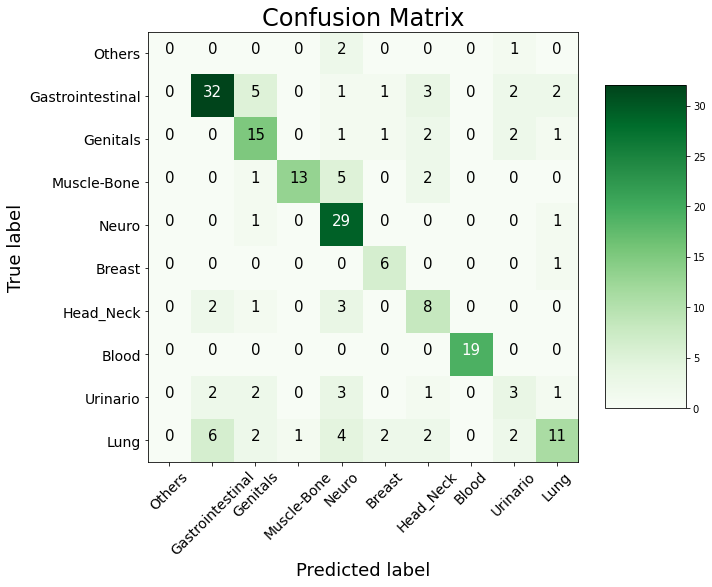

In [25]:
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')

**Try the same but with focal loss**

![Focal loss](https://lh4.googleusercontent.com/_Zb8VyevBHbPdlPS1Bcph18b0GnRdY__yrSWaxEobHAOSq5izCVXdRS0Eo-26pU5Q8JE2daQAmFlwwUKnRiaf7JJrv7VJOLXbTOF-B6G8yshVWdBwhRXFBuMB5L6eH7KCTjzen-t7e39pxku5A)

In [42]:

def categorical_focal_loss(alpha, gamma=2.):
    """
    Softmax version of focal loss.
    When there is a skew between different categories/labels in your data set, you can try to apply this function as a
    loss.
           m
      FL = ∑  -alpha * (1 - p_o,c)^gamma * y_o,c * log(p_o,c)
          c=1
      where m = number of classes, c = class and o = observation
    Parameters:
      alpha -- the same as weighing factor in balanced cross entropy. Alpha is used to specify the weight of different
      categories/labels, the size of the array needs to be consistent with the number of classes.
      gamma -- focusing parameter for modulating factor (1-p)
    Default value:
      gamma -- 2.0 as mentioned in the paper
      alpha -- 0.25 as mentioned in the paper
    References:
        Official paper: https://arxiv.org/pdf/1708.02002.pdf
        https://www.tensorflow.org/api_docs/python/tf/keras/backend/categorical_crossentropy
    Usage:
     model.compile(loss=[categorical_focal_loss(alpha=[[.25, .25, .25]], gamma=2)], metrics=["accuracy"], optimizer=adam)
    """

    alpha = np.array(alpha, dtype=np.float32)

    def categorical_focal_loss_fixed(y_true, y_pred):
        """
        :param y_true: A tensor of the same shape as `y_pred`
        :param y_pred: A tensor resulting from a softmax
        :return: Output tensor.
        """
        y_true = tf.cast(y_true, tf.float32)
        # Clip the prediction value to prevent NaN's and Inf's
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate Cross Entropy
        cross_entropy = -y_true * K.log(y_pred)

        # Calculate Focal Loss
        loss = alpha * K.pow(1 - y_pred, gamma) * cross_entropy

        # Compute mean loss in mini_batch
        return K.mean(K.sum(loss, axis=-1))

    return categorical_focal_loss_fixed

In [70]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=[.25, .25, .25, .25, .25, .25, .25, .25, .25, .25], gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_2.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =100,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/100
 3/26 [==>...........................] - ETA: 0s - loss: 0.9115 - accuracy: 0.1250

2021-11-28 10:58:20.356632: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 22ms/step - loss: 0.6493 - accuracy: 0.1506 - val_loss: 0.4083 - val_accuracy: 0.3122

Epoch 00001: val_accuracy improved from -inf to 0.31220, saving model to best_model_2.hdf5
Epoch 2/100
 1/26 [>.............................] - ETA: 0s - loss: 0.5154 - accuracy: 0.1250

2021-11-28 10:58:20.937823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 0s 17ms/step - loss: 0.3882 - accuracy: 0.2876 - val_loss: 0.3694 - val_accuracy: 0.3268

Epoch 00002: val_accuracy improved from 0.31220 to 0.32683, saving model to best_model_2.hdf5
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 0.3459 - accuracy: 0.3329 - val_loss: 0.3276 - val_accuracy: 0.4098

Epoch 00003: val_accuracy improved from 0.32683 to 0.40976, saving model to best_model_2.hdf5
Epoch 4/100
26/26 [==============================] - 0s 16ms/step - loss: 0.2986 - accuracy: 0.4492 - val_loss: 0.3246 - val_accuracy: 0.4195

Epoch 00004: val_accuracy improved from 0.40976 to 0.41951, saving model to best_model_2.hdf5
Epoch 5/100
26/26 [==============================] - 0s 18ms/step - loss: 0.2764 - accuracy: 0.4761 - val_loss: 0.2770 - val_accuracy: 0.5073

Epoch 00005: val_accuracy improved from 0.41951 to 0.50732, saving model to best_model_2.hdf5
Epoch 6/100
26/26 [==============================] - 0s 18ms/ste

In [57]:
best_model_2 = load_model('best_model_2.hdf5', compile=False)
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred, dummy_na=True)
y_pred = y_pred.T.reindex(range(10)).T.fillna(0)

2021-11-28 10:46:42.329084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


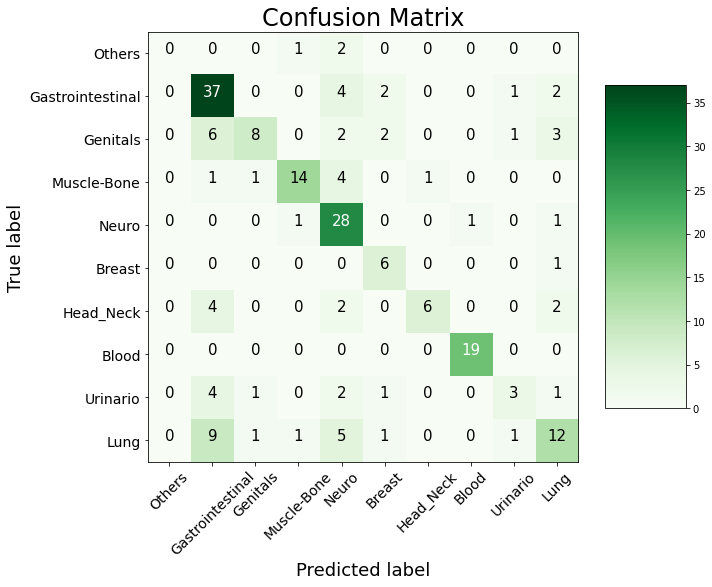

In [61]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




**Try the same but adjust alpha paramter wrt class percentage**

In [74]:
n_obs = cm.sum(axis=1)
class_perc = n_obs/sum(n_obs)

In [75]:
model = Sequential()

#1°layer
model.add(Dense(400, input_shape=(17393,)))
model.add(Activation('relu'))
model.add(Dropout(0.25))

#2°layer
model.add(Dense(300))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#3°layer
model.add(Dense(10))
model.add(Activation('softmax'))

#categorical_crossentropy loss per classificazione (penalizza molto le previsioni che sono sbagliate ma con alta probabilità)
model.compile(optimizer = 'adam', metrics=['accuracy'], 
    loss=[categorical_focal_loss(alpha=class_perc, gamma=2)])

early_stopping_monitor = EarlyStopping(patience= 15, monitor = 'val_accuracy')

model_chekpoint_callback = ModelCheckpoint(filepath='best_model_2.hdf5',
                                           monitor = 'val_accuracy',
                                           mode = 'auto',
                                           save_best_only=True,
                                           verbose=1)

hystory = model.fit(X_train_reshaped, y_train,
         validation_data = (X_test_reshaped,y_test),
                    epochs =100,
                   callbacks = (early_stopping_monitor,model_chekpoint_callback))


Epoch 1/100
 3/26 [==>...........................] - ETA: 0s - loss: 0.4953 - accuracy: 0.1562

2021-11-28 11:00:17.786784: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


26/26 [==============================] - 1s 24ms/step - loss: 0.3157 - accuracy: 0.1726 - val_loss: 0.1667 - val_accuracy: 0.3220

Epoch 00001: val_accuracy improved from -inf to 0.32195, saving model to best_model_2.hdf5


2021-11-28 11:00:18.413095: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 2/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1668 - accuracy: 0.2472 - val_loss: 0.1511 - val_accuracy: 0.2244

Epoch 00002: val_accuracy did not improve from 0.32195
Epoch 3/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1544 - accuracy: 0.2681 - val_loss: 0.1352 - val_accuracy: 0.3220

Epoch 00003: val_accuracy did not improve from 0.32195
Epoch 4/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1269 - accuracy: 0.3696 - val_loss: 0.1171 - val_accuracy: 0.4341

Epoch 00004: val_accuracy improved from 0.32195 to 0.43415, saving model to best_model_2.hdf5
Epoch 5/100
26/26 [==============================] - 0s 17ms/step - loss: 0.1093 - accuracy: 0.4198 - val_loss: 0.1091 - val_accuracy: 0.4780

Epoch 00005: val_accuracy improved from 0.43415 to 0.47805, saving model to best_model_2.hdf5
Epoch 6/100
26/26 [==============================] - 0s 17ms/step - loss: 0.0983 - accuracy: 0.4504 - val_loss: 0.1116 - val_accur

In [76]:
best_model_3 = load_model('best_model_2.hdf5', compile=False)
y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_pred = pd.get_dummies(y_pred, dummy_na=True)
y_pred = y_pred.T.reindex(range(10)).T.fillna(0)

2021-11-28 11:00:40.046668: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


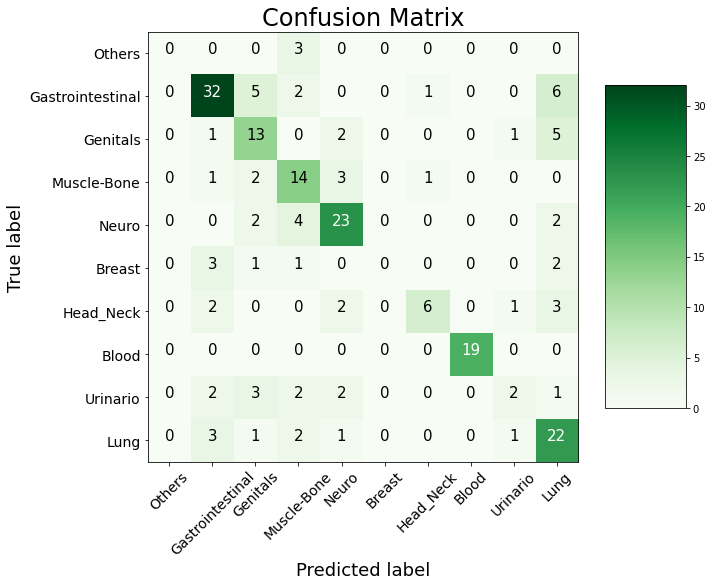

In [77]:
#Change the name of the coloumns of the class matrix created through get_dummies 
# using more meaningful names
y_test = y_test.set_axis(Cancer_Type, axis = 1)
y_pred = y_pred.set_axis(Cancer_Type, axis= 1)
y_train = y_train.set_axis(Cancer_Type, axis= 1)

y_pred = np.argmax(best_model.predict(X_test_reshaped),axis = 1)
y_test_confusion = multiclass_test.iloc[:,17395]

cm = confusion_matrix(y_test_confusion,y_pred)
plot_confusion_matrix(cm, classes = Cancer_Type,
                        title = 'Confusion Matrix')




No dramatic change :(

**Permutation importance first model**

In [ ]:
results = permutation_importance(best_model, X_test, y_test, scoring='neg_mean_squared_error')
nn_importance = results.importances_mean

In [ ]:
nn_importance[:120].plot.bar(figsize = (25, 10), color = 'r')
plt.title('Neural Network Feature Importance (Top 120)')
plt.xlabel('Features')
plt.show()